In [1]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#Neural network class definition
"""

"""

class neuralNetwork:
    def __init__(self,inputNodes,hiddenNodes,hiddenNodesTwo,outputNodes,learningRate):
        #nodes
        self.inputNodes = inputNodes
        self.hiddenNodes = hiddenNodes
        self.hiddenNodesTwo = hiddenNodesTwo
        self.outputNodes = outputNodes

        #parameters
        self.learningRate = learningRate

        #Weights
        self.wih = numpy.random.normal(0.0,pow(self.inputNodes,-0.5),(self.hiddenNodes,self.inputNodes))
        self.whh = numpy.random.normal(0.0,pow(self.hiddenNodes,-0.5),(self.hiddenNodesTwo,self.hiddenNodes))
        self.who = numpy.random.normal(0.0,pow(self.hiddenNodesTwo,-0.5),(self.outputNodes,self.hiddenNodesTwo))

        #initialization functions
        self.activation_function = lambda x: scipy.special.expit(x)

        
    ## train the network    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets = numpy.array(targets_list,ndmin=2).T  

        hidden_inputs = numpy.dot(self.wih,inputs)  
        hidden_outputs = self.activation_function(hidden_inputs)

        hidden_two_inputs = numpy.dot(self.whh,hidden_outputs)  
        hidden_two_outputs = self.activation_function(hidden_two_inputs)        

        final_inputs = numpy.dot(self.who,hidden_two_outputs)  
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_two_errors = numpy.dot(self.who.T,output_errors)
        hidden_errors = numpy.dot(self.whh.T,hidden_two_errors)





        #update weights for links between the hidden layer and the output layers
        self.who += self.learningRate * numpy.dot((output_errors*final_outputs*(1.0 - final_outputs)),numpy.transpose(hidden_two_outputs))


        #update weights for links between 1st hidden and 2nd hidden layers
        self.whh += self.learningRate * numpy.dot((hidden_two_errors*hidden_two_outputs*(1.0 - hidden_two_outputs)),numpy.transpose(hidden_outputs))

        
        #update weights for links between the input layer and the hidden layers
        self.wih += self.learningRate * numpy.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)),numpy.transpose(inputs))


    ##calculate forward feed
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T 

        hidden_inputs = numpy.dot(self.wih,inputs)  
        hidden_outputs = self.activation_function(hidden_inputs)

        hidden_two_inputs = numpy.dot(self.whh,hidden_outputs)  
        hidden_two_outputs = self.activation_function(hidden_two_inputs)

        final_inputs = numpy.dot(self.who,hidden_two_outputs)  
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [78]:
#define a Neural network model
class model:
    #Initialize a NN object
    def __init__(self,inputNodes,hiddenNodes,hiddenNodesTwo,outputNodes,learningRate): 
        self.outputNodes = outputNodes
        self.nn = neuralNetwork(inputNodes,hiddenNodes,hiddenNodesTwo,outputNodes,learningRate)
    
        #train with a desired data set 
        #todo: split 1st parameter into training and target, epochs
    def train(self,train_list,epochs):
        for e in range(epochs):
            for data in train_list:
                all_values = data.split(',')
                #scale imputs form 0-255 to 0.01 - 0.99 todo: remove data prep state for more general use
                scaled_input = (numpy.asfarray(all_values[1:])/255 * 0.99) + 0.01
                #create array of zeros for targets with length out total output nodes
                targets = numpy.zeros(self.outputNodes) + 0.01
                targets[int(all_values[0])] = 0.99
                #train neural network
                self.nn.train(scaled_input,targets)
     

    #score
    #todo: score should have test list and targets seperate
    #todo: remove scaling, should be done outside             
    def score(self,test_list):
        scorecard = [0,0]
        for obj in test_list:
            all_values = obj.split(',')
            target_labels = int(all_values[0])
            
            scaled_input = (numpy.asfarray(all_values[1:])/255 * 0.99) + 0.01
            outputs = self.nn.query(scaled_input)
            label = numpy.argmax(outputs)
            
            if (label == target_labels):
                scorecard[0] += 1
            else:
                scorecard[1] += 1    
        print(scorecard)
        print("Accuracy: ",scorecard[0]/(scorecard[0] + scorecard[1]))        

In [79]:

outputNodes = 10
inputNodes = 784
hiddenNodes = 500
hiddenNodes_two = 200

model = model(inputNodes,hiddenNodes,hiddenNodes_two,outputNodes,0.2)


In [30]:
data_file = open(r"C:\Users\Alec\Documents\data\mnist_train.csv",'r')
data_list_train = data_file.readlines()
data_file.close()

data_file = open(r"C:\Users\Alec\Documents\data\mnist_test.csv",'r')
data_list_test = data_file.readlines()
data_file.close()


In [80]:
model.train(data_list_train,2)

In [82]:
model.score(data_list_test)

[8585, 1415]
Accuracy:  0.8585


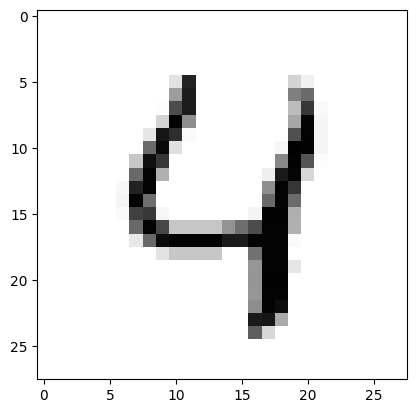

9

In [110]:
#shows one image and shows what it is
all__test_values = data_list_test[4].split(',')
image_array = numpy.asfarray(all__test_values [1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation=None)
plt.show()


nn.query((numpy.asfarray(all__test_values[1:])/255.0 * 0.99)+0.1).argmax(axis=0)[0]  